### Traveling Salesman

The Traveling Salesman Problem (TSP) is a problem in _graph theory_ faced by a salesperson who needs to visit a number of customers located in different cities while taking the shortest round trip route

The objective is to find the most efficient Hamiltonian Cycle a salesman can take for _n_ cities

Hamiltonian Cycle: Graph that visits each city (node) exactly once, while returning back to the starting point

There are many applications of TSP such as:
* Planning
* Logistics
* Microchip manufacturing

Reference: [Click Here](https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/)

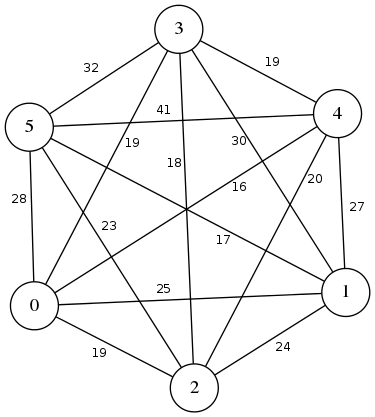

In [109]:
# Defining Graph Problem
from PIL import Image
import requests
from io import BytesIO

url = 'https://lh3.googleusercontent.com/proxy/pALsGLjkRoooD3l3-lKZeYTpISGhKR97vBNNxDJXfNylfJZ_ytmlpqd6aGzNw8adC_i_841TtdBDWv8fPi8PrhDwjJO0UDwN_s3qwSnr4Cg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
display(img)

### Traveling Salesman Problem: Graph

In [2]:
# Matrix Representaiton Graph Above
graph = [[0, 25, 19, 19, 16, 28]
        ,[25, 0, 24, 30, 27, 17] 
        ,[19, 24, 0, 18, 20, 23]
        ,[19, 30, 18, 0, 19, 32]
        ,[16, 27, 20, 19, 0, 41] 
        ,[28, 17, 23, 32, 41, 0]]

# Starting Vertex
s = 0

# Number Vertices
V = len(graph[0])

### Next Permutation Function

In [22]:
# Next Permutation
def next_permutation(L): 
    """ 
    Assumption:
    L must be in ascending order
    """
    
    # Find Length 
    n = len(L) 
    
    # Number Iterations
    i = n - 2
    
    # Remove 1 Iteration
    while i >= 0 and L[i] >= L[i + 1]: 
        i -= 1
  
    # Stop when next permutation DNE
    if i == -1: 
        status = False
        return L, status
  
    # Perform Purmuation P_i
    j = i + 1
    while j < n and L[j] > L[i]: 
        j += 1
    j -= 1
    L[i], L[j] = L[j], L[i] 
  
    left = i + 1
    right = n - 1
  
    while left < right: 
        L[left], L[right] = L[right], L[left] 
        left += 1
        right -= 1
        
    status = True
    
    return L, status

### Traveling Salesman Problem: Naive Approach

In [27]:
# Traveling Salesman Problem: Naive Approach 
def tsp(graph,s):
    
    # List Of Unique Vertices (Excluding Starting Point)
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 
    #print(vertex)
    
    # Store New Min Paths, Cost      
    cost = []
    
    # Initializing Minimum Path
    min_path = 9999999999999999 

    while True: 

        # Store Current Path Cost
        current_pathweight = 0

        # Find Cost Current Path
        k = s 
    
        for i in range(len(vertex)): 
            current_pathweight += graph[k][vertex[i]] 
            k = vertex[i] 

        current_pathweight += graph[k][s] 

        # Store Only If Next Iter = Minimum
        if current_pathweight <= min_path:
            cost.append([vertex.copy(),current_pathweight])
            
            # Update Minimum
            min_path = current_pathweight

        # Next Permutation Cost
        vertex, status = next_permutation(vertex)

        # Break When Next Permutation DNE
        if not status: 
            break
            
    return cost 

### Traveling Salesman Problem: Solution Analysis

In [28]:
solutions = tsp(graph,s)
display(solutions)

"""
Notes:
* There are two solutions to the graph above
* It is clear that the solutions s1 = reverse(s2) and vice versa
* The total cost of the optimal route solution is 118
* Solution: 0 -> 1 -> 5 -> 2 -> 3 -> 4 -> 0
* Solution: 25 + 17 + 23 + 18 + 19 + 16 = 118
""";

[[[1, 2, 3, 4, 5], 155],
 [[1, 2, 4, 3, 5], 148],
 [[1, 2, 5, 3, 4], 139],
 [[1, 5, 2, 3, 4], 118],
 [[4, 3, 2, 5, 1], 118]]